# Decision Tree

In [19]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import graphviz # pip install 



In [20]:
DATASET_DIR = os.path.join(os.path.dirname(os.getcwd()), 'datasets')

In [21]:
red_file = os.path.join(DATASET_DIR, 'wine/winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'wine/winequality-white.csv')

In [22]:
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')

In [23]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
len(wine_red), len(wine_white)

(1599, 4898)

In [26]:
wine_red.head()

wine_white.head()

len(wine_red), len(wine_white)

(1599, 4898)

## Classification

### 1. Feature_n: 2(volatile acidity, sulphates), Binary Problem

In [27]:
new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)


In [28]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [29]:
wine.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [30]:
X = wine[['volatile acidity', 'sulphates']]
y = wine['is_red']

##### split train&test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['is_red'], random_state=42)

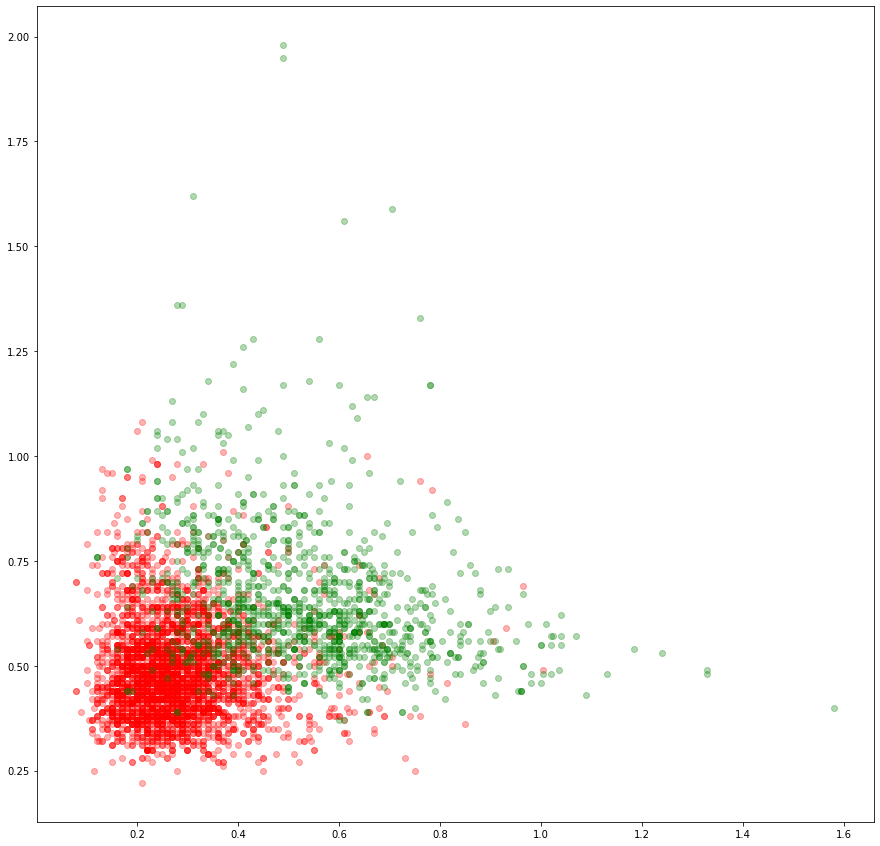

In [33]:
red_index = train_y[train_y==1].index
white_index = train_y[train_y==0].index
plt.figure(figsize=(15,15))
plt.scatter(x=train_X.loc[white_index, 'volatile acidity'], y=train_X.loc[white_index, 'sulphates'], color='r', alpha=0.3)

plt.scatter(x=train_X.loc[red_index, 'volatile acidity'], y=train_X.loc[red_index, 'sulphates'], color='g',  alpha=0.3)

plt.show()

In [34]:
import sys
sys.path.append

<function list.append>

In [236]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# random_state: 난수값

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""


clf = tree.DecisionTreeClassifier('entropy', max_depth=2)
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

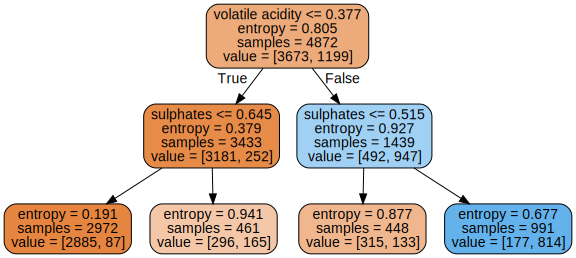

In [237]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [238]:
clf.classes_

array([0, 1])

In [239]:
clf.max_features_

2

In [240]:
clf.n_classes_

2

In [241]:
clf.n_features_

2

In [242]:
clf.get_n_leaves()

4

In [243]:
# Returns the mean accuracy on the given test data and labels.
clf.score(train_X,train_y)

0.8846469622331691

In [244]:
clf.score(test_X, test_y)

0.8898461538461538

In [245]:
train_X.iloc[1]

volatile acidity    0.27
sulphates           0.42
Name: 5370, dtype: float64

In [246]:
# 
# (a, b) = (X_index, node_index)
m = clf.decision_path(X.loc[:1])
print(m)

  (0, 0)	1
  (0, 4)	1
  (0, 6)	1
  (1, 0)	1
  (1, 4)	1
  (1, 6)	1


In [247]:
# Predict class log-probabilities of the input samples X.
clf.predict_log_proba(X)

array([[-1.7225648 , -0.19675417],
       [-1.7225648 , -0.19675417],
       [-1.7225648 , -0.19675417],
       ...,
       [-0.02971023, -3.53108229],
       [-0.02971023, -3.53108229],
       [-0.02971023, -3.53108229]])

In [248]:
# The predicted class probability is the fraction of samples of the same class in a leaf.
clf.predict_proba(X)

array([[0.17860747, 0.82139253],
       [0.17860747, 0.82139253],
       [0.17860747, 0.82139253],
       ...,
       [0.97072678, 0.02927322],
       [0.97072678, 0.02927322],
       [0.97072678, 0.02927322]])

In [249]:
clf.get_depth()

2

In [250]:
clf.apply(X.loc[:10]) # node의 위치

array([6, 6, 6, 2, 6, 6, 5, 5, 6, 6, 6])

In [251]:
clf.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

### parameter 조정 # depth3

In [252]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""
clf = tree.DecisionTreeClassifier('entropy', max_depth=3)
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

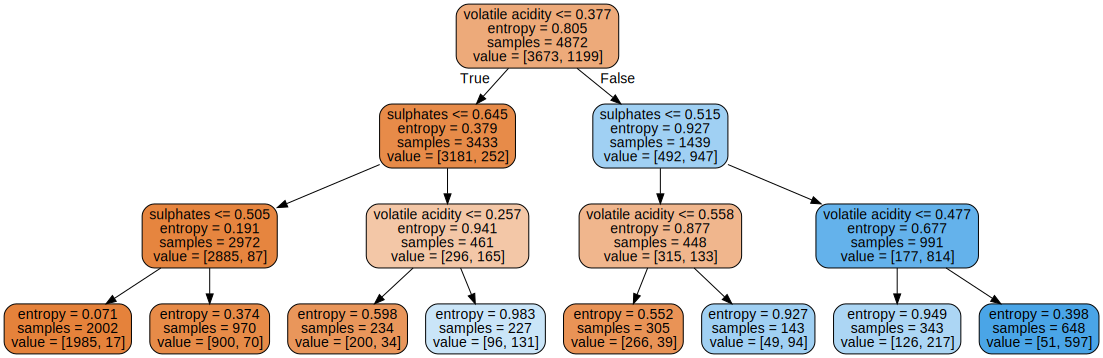

In [253]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [254]:
clf.score(train_X,train_y)

0.9010673234811166

In [255]:
clf.score(test_X, test_y)

0.9064615384615384

In [256]:
from sklearn import tree


clf = tree.DecisionTreeClassifier('entropy', max_depth=3, )
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [257]:
from sklearn import tree


clf = tree.DecisionTreeClassifier('entropy', max_depth=5)
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [258]:
clf.score(train_X,train_y), clf.score(test_X, test_y)

(0.9205665024630542, 0.9126153846153846)

In [259]:
clf.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0])

In [228]:
# Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. 
# The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. 
# The higher the value the more important the feature.

X.columns, clf.feature_importances_

(Index(['volatile acidity', 'sulphates'], dtype='object'),
 array([0.66358021, 0.33641979]))

In [229]:
test_y[:3]

3128    0
4224    0
6431    0
Name: is_red, dtype: int64

In [214]:
clf.get_n_leaves()

31

### 파라미터 조정 # max_leaf_nodes

In [283]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""
clf = tree.DecisionTreeClassifier('entropy',  max_depth=3)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [284]:
clf.score(train_X, train_y)

0.9137931034482759

In [285]:
clf.score(test_X, test_y)

0.9144615384615384

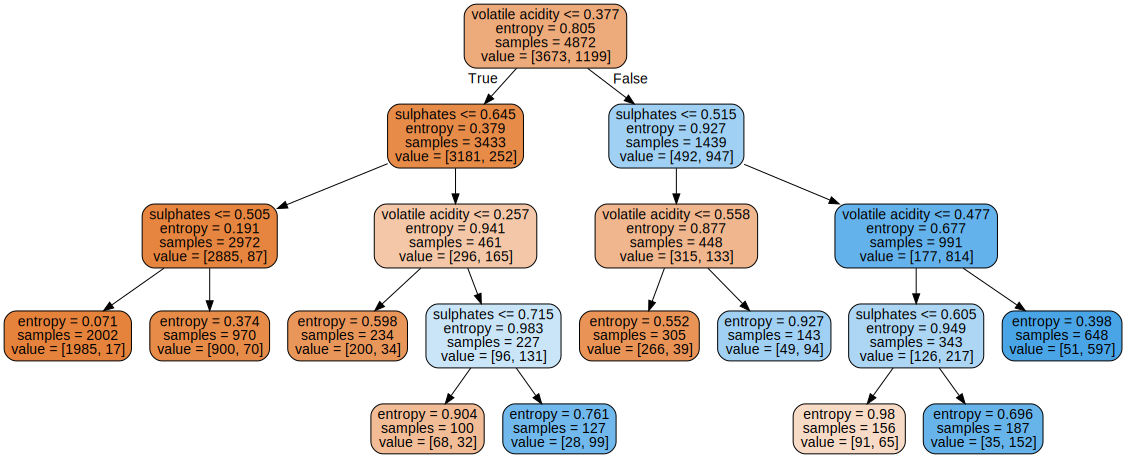

In [286]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=5, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

# 실습1: depth가 5이고  max_leaf_nodes가 10인 트리를 만들고 학습시키시오.


In [ ]:
# clf = tree.DecisionTreeClassifier('entropy',max_depth=5, max_leaf_nodes=10)

$$Gini = 1-\sum_jp_j^2$$

### Overfitting  # 이전 예제에 비해 비교적

In [215]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [216]:
clf.

SyntaxError: invalid syntax (<ipython-input-216-8097f1fc138e>, line 1)

In [217]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.8990769230769231

### 1. depth제한 X:  Feature_n: 2(volatile acidity, sulphates), Binary Problem

In [218]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

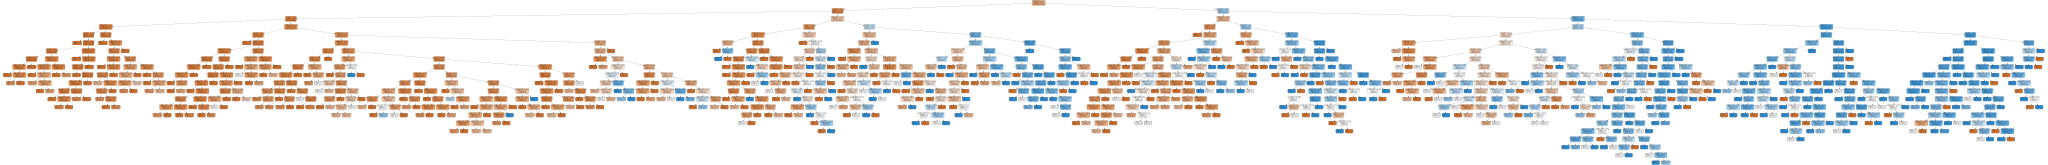

In [219]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [220]:
clf.score(train_X, train_y)

0.9614121510673235

In [188]:
clf.score(test_X, test_y)

0.8990769230769231

In [137]:
clf.classes_

array([0, 1])

In [138]:
clf.max_features_

2

In [139]:
clf.n_classes_

2

In [140]:
clf.n_features_

2

In [146]:
clf.get_n_leaves()

4

In [141]:
# Returns the mean accuracy on the given test data and labels.
clf.score(train_X,train_y)

0.8846469622331691

In [142]:
clf.score(test_X, test_y)

0.8898461538461538

In [143]:
train_X.iloc[1]

volatile acidity    0.27
sulphates           0.42
Name: 5370, dtype: float64

In [160]:
# 
# (a, b) = (X_index, node_index)
m = clf.decision_path(X.loc[:1])
print(m)

  (0, 0)	1
  (0, 4)	1
  (0, 6)	1
  (1, 0)	1
  (1, 4)	1
  (1, 6)	1


In [148]:
# Predict class log-probabilities of the input samples X.
clf.predict_log_proba(X)

array([[-1.7225648 , -0.19675417],
       [-1.7225648 , -0.19675417],
       [-1.7225648 , -0.19675417],
       ...,
       [-0.02971023, -3.53108229],
       [-0.02971023, -3.53108229],
       [-0.02971023, -3.53108229]])

In [149]:
# The predicted class probability is the fraction of samples of the same class in a leaf.
clf.predict_proba(X)

array([[0.17860747, 0.82139253],
       [0.17860747, 0.82139253],
       [0.17860747, 0.82139253],
       ...,
       [0.97072678, 0.02927322],
       [0.97072678, 0.02927322],
       [0.97072678, 0.02927322]])

In [150]:
clf.get_depth()

2

In [154]:
clf.apply(X.loc[:10]) # node의 위치

array([6, 6, 6, 2, 6, 6, 5, 5, 6, 6, 6])

In [155]:
clf.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

# 2. Feature: All, y= red or white

In [287]:
new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)

In [288]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [289]:
wine.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [290]:
X = wine.drop('is_red', axis=1)
y = wine['is_red']

In [296]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['is_red'], random_state=42)

In [366]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', max_features=3, random_state=10)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [370]:
clf.score(train_X, train_y)

0.9786535303776683

In [371]:
clf.score(test_X, test_y)

0.9827692307692307

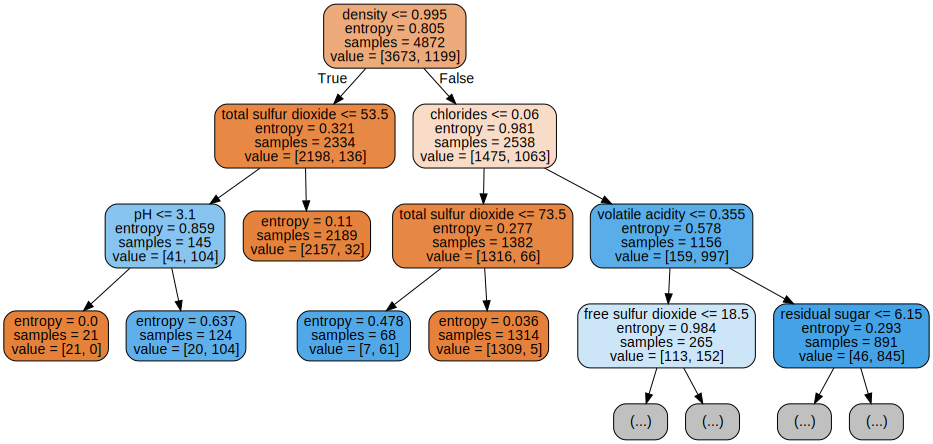

In [369]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [364]:
list(zip(X.columns, clf.feature_importances_))

[('fixed acidity', 0.02009143088000369),
 ('volatile acidity', 0.0335000516600319),
 ('citric acid', 0.012329136553730755),
 ('residual sugar', 0.027428542890768397),
 ('chlorides', 0.06807076338858901),
 ('free sulfur dioxide', 0.016133893439408804),
 ('total sulfur dioxide', 0.5764207159138673),
 ('density', 0.17891896016097739),
 ('pH', 0.021162113338378287),
 ('sulphates', 0.03686116497707813),
 ('alcohol', 0.006417921646746441),
 ('quality', 0.0026653051504198903)]

In [137]:
clf.classes_

array([0, 1])

In [138]:
clf.max_features_

2

In [139]:
clf.n_classes_

2

In [140]:
clf.n_features_

2

In [365]:
clf.get_n_leaves()

95

# 3. Quality 예측

In [372]:
new_red = wine_red.copy()
new_white = wine_white.copy()


In [374]:
X = new_red.drop('quality', axis=1)
y = new_red['quality']

In [379]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)


In [381]:
train_y.head()

1542    6
1558    5
344     6
924     5
971     6
Name: quality, dtype: int64

In [447]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', random_state=0)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

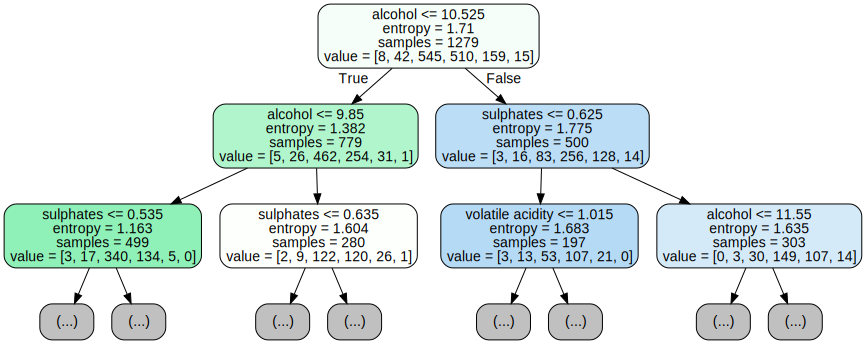

In [448]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [449]:
clf.score(train_X, train_y)

0.8788115715402658

In [450]:
clf.score(test_X, test_y)

0.6

In [439]:
list(zip(X.columns, clf.feature_importances_))

[('fixed acidity', 0.07391906181608769),
 ('volatile acidity', 0.11629849893284064),
 ('citric acid', 0.05788886494735533),
 ('residual sugar', 0.0784970064988638),
 ('chlorides', 0.05662613198027193),
 ('free sulfur dioxide', 0.04452005755686164),
 ('total sulfur dioxide', 0.09170644678797549),
 ('density', 0.04698259297918923),
 ('pH', 0.10408914337632276),
 ('sulphates', 0.11690231085845651),
 ('alcohol', 0.21256988426577506)]

In [440]:
clf.classes_

array([3, 4, 5, 6, 7, 8])

In [441]:
clf.max_features_

11

In [442]:
clf.n_classes_

6

In [443]:
clf.n_features_

11

In [444]:
clf.get_n_leaves()

297

In [445]:
clf.get_depth()

19

# 실습1. white wine에 대해서 Quality 예측

# 실습2. 전체 와인셋(red+ white)에 대해 quality 예측

# 실습3. 전체 와인셋(red+ white)에 대해 depth가(2부터 20까지 중에 최적 depth 찾기)